# Data Exploration and Validation

In this exercise we will cover how to use Ibis, Pandas, and Pandera to explore, tidy, and validate the data.

### Activity 1 - load data from SQL

#### 🔄 Task

- Use `ibis` to load the data from SQL into a pandas dataframe.

🚨 Only load the first 10,000 rows. This will speed our our ETL and testing.

#### ✅ Solution

In the first exercise we used SQLAlchemy to interact with SQL. Ibis is another Python package for interacting with SQL databases. Ibis is specially designed for analytics workloads.

```bash
python -m pip install 'ibis-framework[postgres]'
```

In [1]:
import ibis
import keyring

# Set up ibis for reading data
con = ibis.postgres.connect(
    user="posit",
    password=keyring.get_password("conf23_db", "posit"),
    host="posit-conf-2023-ds-workflowsf5086c0.cpbvczwgws3n.us-east-2.rds.amazonaws.com",
    port=5432,
    database="python_workshop"
)

Load the business license data.

In [2]:
business_license_raw = con.table(name="business_license_raw").limit(10_000).to_pandas()
business_license_raw

,id,license_id,account_number,site_number,legal_name,doing_business_as_name,address,city,state,zip_code,...,license_start_date,expiration_date,license_approved_for_issuance,date_issued,license_status,license_status_change_date,ssa,latitude,longitude,location
0,1905425-20090516,1961133,55554,3,"WOLFE & HURST BOND BROKERS, INC.",WOLFE & HURST BOND BROKERS INC,566 W ADAMS ST 5TH 560,CHICAGO,IL,60661,...,2009-05-16T00:00:00.000,2011-05-15T00:00:00.000,2009-05-01T00:00:00.000,2009-05-04T00:00:00.000,AAI,None,None,41.879383878,-87.642328054,"\n, \n(41.879383877681484, -87.6423280535035)"
1,1905425-20110516,2085738,55554,3,"WOLFE & HURST BOND BROKERS, INC.",WOLFE & HURST BOND BROKERS INC,566 W ADAMS ST 5TH 560,CHICAGO,IL,60661,...,2011-05-16T00:00:00.000,2013-05-15T00:00:00.000,2011-05-12T00:00:00.000,2011-05-13T00:00:00.000,AAC,2011-06-06T00:00:00.000,None,41.879383878,-87.642328054,"\n, \n(41.879383877681484, -87.6423280535035)"
2,1905426-20080523,1905426,331618,1,SPRAY AWAY POWER WASHING INC.,SPRAY AWAY POWER WASHING INC.,2501 W POPE JOHN PAUL II DR 2 2,CHICAGO,IL,60632,...,2008-05-23T00:00:00.000,2009-06-15T00:00:00.000,2008-05-23T00:00:00.000,2008-05-23T00:00:00.000,AAI,None,None,41.81554633,-87.687169604,"\n, \n(41.8155463299018, -87.68716960436498)"
3,1905426-20090616,1968401,331618,1,SPRAY AWAY POWER WASHING INC.,SPRAY AWAY POWER WASHING INC.,2501 W POPE JOHN PAUL II DR 2 2,CHICAGO,IL,60632,...,2009-06-16T00:00:00.000,2011-06-15T00:00:00.000,2009-05-28T00:00:00.000,2009-05-29T00:00:00.000,AAI,None,None,41.81554633,-87.687169604,"\n, \n(41.8155463299018, -87.68716960436498)"
4,1905428-20080605,1905428,331619,1,PANIK ENTERPRISES LLC,NEFF OF CHICAGO CUSTOM CABINETRY AND DESIGN ST...,222 W MERCHANDISE MART PLZ 1 145,CHICAGO,IL,60654,...,2008-06-05T00:00:00.000,2010-05-15T00:00:00.000,2008-06-04T00:00:00.000,2008-06-05T00:00:00.000,AAI,None,None,41.888074281,-87.634955203,"\n, \n(41.8880742810662, -87.63495520292739)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1922364-20131116,2287656,335673,1,GRAND AVENUE STATION LLC,MOBIL MART,3601 W GRAND AVE 1ST,CHICAGO,IL,60651,...,2013-11-16T00:00:00.000,2015-11-15T00:00:00.000,2013-10-21T00:00:00.000,2013-10-22T00:00:00.000,AAI,None,None,41.902168575,-87.716676296,"\n, \n(41.902168574992835, -87.71667629577051)"
9996,1922364-20151116,2426461,335673,1,GRAND AVENUE STATION LLC,MOBIL MART,3601 W GRAND AVE 1ST,CHICAGO,IL,60651,...,2015-11-16T00:00:00.000,2017-11-15T00:00:00.000,2015-10-06T00:00:00.000,2015-10-07T00:00:00.000,AAI,None,None,41.902168575,-87.716676296,"\n, \n(41.902168574992835, -87.71667629577051)"
9997,1926912-20080821,1926912,322303,1,NEXT LEVEL CONSTRUCTION LLC,NEXT LEVEL CONSTRUCTION LLC,2824 186 ST,LANSING,IL,60438,...,2008-08-21T00:00:00.000,2009-09-15T00:00:00.000,2008-08-21T00:00:00.000,2008-08-21T00:00:00.000,AAI,None,None,None,None,None
9998,1922364-20171116,2558132,335673,1,GRAND AVENUE STATION LLC,MOBIL MART,3601 W GRAND AVE 1ST,CHICAGO,IL,60651,...,2017-11-16T00:00:00.000,2019-11-15T00:00:00.000,2017-11-02T00:00:00.000,2017-11-02T00:00:00.000,AAI,None,None,41.902168575,-87.716676296,"\n, \n(41.902168574992835, -87.71667629577051)"


Load the food inspection data.

In [3]:
food_inspection_raw = con.table(name="food_inspection_raw").limit(10_000).to_pandas()
food_inspection_raw

,inspection_id,dba_name,aka_name,license_,facility_type,risk,address,city,state,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location
0,505211,DLS SUPERMARKET INC.,DLS SUPERMARKET INC,2079431,Grocery Store,Risk 3 (Low),3659 W DIVISION ST,CHICAGO,IL,60651,2011-02-04T00:00:00.000,License,Fail,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.902624889105226,-87.71893483720407,"(41.902624889105226, -87.71893483720407)"
1,491576,Calhoun North,Calhoun North,26001,School,Risk 1 (High),2833 W Adams St (200S),CHICAGO,IL,60612,2011-02-04T00:00:00.000,Canvass,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.878221146360936,-87.69755292180749,"(41.878221146360936, -87.69755292180749)"
2,557211,LE POULET,LE POULET,2043161,Restaurant,Risk 2 (Medium),3205 N OPAL AVE,CHICAGO,IL,60634,2011-02-04T00:00:00.000,Canvass Re-Inspection,Pass,None,41.93800880836629,-87.82248678693516,"(41.93800880836629, -87.82248678693516)"
3,158453,MORGAN ELEMENTARY,MORGAN ELEMENTARY,24501,School,Risk 1 (High),8407 S Kerfoot (700W),CHICAGO,IL,60620,2011-02-04T00:00:00.000,Canvass,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.74124548972356,-87.64007165863106,"(41.74124548972356, -87.64007165863106)"
4,539210,Auntie Anne's Pretzels,Auntie Anne's Pretzels (T2 E/F),1942304,Restaurant,Risk 2 (Medium),11601 W TOUHY AVE,CHICAGO,IL,60666,2011-02-04T00:00:00.000,Canvass,Fail,8. SANITIZING RINSE FOR EQUIPMENT AND UTENSILS...,42.008536400868735,-87.91442843927047,"(42.008536400868735, -87.91442843927047)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,604367,VILLA ROSA PIZZA AND PASTA,VILLA ROSA PIZZA AND PASTA,1887536,Restaurant,Risk 1 (High),5345 W DEVON AVE,CHICAGO,IL,60646,2011-08-11T00:00:00.000,Canvass,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.99722474001257,-87.7625872415933,"(41.99722474001257, -87.7625872415933)"
9996,634259,TACO BELL #15855,TACO BELL #15855,56987,Restaurant,Risk 1 (High),1111 W ADDISON ST,CHICAGO,IL,60613,2011-08-11T00:00:00.000,Tag Removal,Pass w/ Conditions,None,41.947056373374444,-87.65796549962256,"(41.947056373374444, -87.65796549962256)"
9997,634254,SYDNEY MAROVITZ GOLF COURSE,CLOCK TOWER CAFE,2055272,Restaurant,Risk 3 (Low),3600 N RECREATION DR,CHICAGO,IL,60613,2011-08-11T00:00:00.000,License,Fail,"11. ADEQUATE NUMBER, CONVENIENT, ACCESSIBLE, D...",41.9488655712457,-87.64303424515734,"(41.9488655712457, -87.64303424515734)"
9998,634251,PIZZA HUT #405039,PIZZA HUT #405039,1249531,Restaurant,Risk 2 (Medium),4925 W NORTH AVE,CHICAGO,IL,60639,2011-08-11T00:00:00.000,Short Form Complaint,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.90946997358203,-87.74966585106277,"(41.90946997358203, -87.74966585106277)"


### Activity 2 - Explore the data

#### 🔄 Task

Begin exploring the data. You will want to understand.

- What columns exist in the data?
- How do the two data sets relate to one another?
- What is the type of each column (e.g. string, number, category, date)?
- Which columns could be useful for the model.
- What is the cardinality of categorical data?
- Is all of the data in scope?
- What steps will I need to perform to clean the data?

🚨 We are not performing feature engineering at this stage. But it is a good time to start thinking about what features you can create from the data.

#### ✅ Solution

In [31]:
import pandas as pd

##### Business license data

Distribution of business locations:

<Axes: xlabel='latitude', ylabel='longitude'>

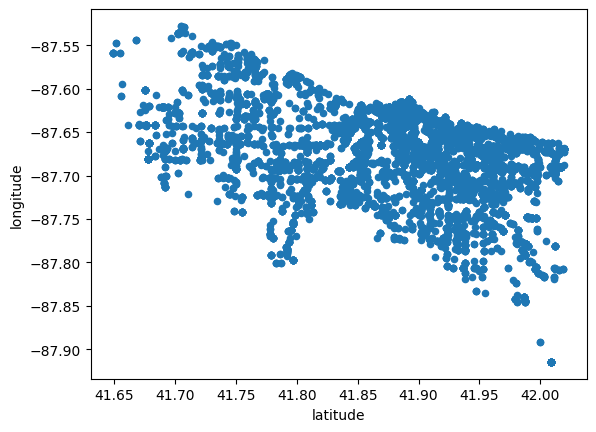

In [10]:
business_license_raw \
    .assign(
        latitude=lambda x: pd.to_numeric(x["latitude"]),
        longitude=lambda x: pd.to_numeric(x["longitude"]),
    ) \
    .plot(x="latitude", y="longitude", kind="scatter")

Most common license types:

In [17]:
business_license_raw \
    .assign(license_code_name=lambda x: x["license_code"] + " - " + x["license_description"]) \
    .loc[:, "license_code_name"] \
    .value_counts() \
    .sort_values(ascending=False) \
    .head(50)

1010 - Limited Business License                                        4721
1006 - Retail Food Establishment                                       1232
1329 - Special Event Food                                               611
1012 - Home Occupation                                                  349
1475 - Consumption on Premises - Incidental Activity                    296
1781 - Tobacco                                                          290
1011 - Home Repair                                                      275
1604 - Peddler, non-food                                                210
1470 - Tavern                                                           149
1605 - Street Performer                                                 114
1009 - Manufacturing Establishments                                     111
1569 - Motor Vehicle Repair : Engine Only (Class II)                    107
1050 - Public Place of Amusement                                         98
1008 - Hazar

Do businesses have multiple licenses?

In [29]:
# Find the most common business
most_common_business = business_license_raw["legal_name"] \
    .value_counts() \
    .sort_values(ascending=False) \
    .head(1) \
    .reset_index() \
    .loc[0, "index"]

print(most_common_business)

business_license_raw \
    .loc[business_license_raw["legal_name"] == most_common_business] \
    .sort_values(by="license_id")

ONEMAIN FINANCIAL OF ILLINOIS, INC.


,id,license_id,account_number,site_number,legal_name,doing_business_as_name,address,city,state,zip_code,...,license_start_date,expiration_date,license_approved_for_issuance,date_issued,license_status,license_status_change_date,ssa,latitude,longitude,location
7824,19207-20020516,1241588,85588,1,"ONEMAIN FINANCIAL OF ILLINOIS, INC.","AMERICAN GENERAL FINANCIAL SERVICES OF IL, INC.",3027 N PULASKI RD 1,CHICAGO,IL,60641,...,2002-05-16T00:00:00.000,2003-05-15T00:00:00.000,2002-05-14T00:00:00.000,2002-05-15T00:00:00.000,AAI,None,None,41.936197488,-87.726953712,"\n, \n(41.93619748804569, -87.72695371247816)"
7933,19208-20020516,1241589,85588,2,"ONEMAIN FINANCIAL OF ILLINOIS, INC.","AMERICAN GENERAL FINANCIAL SERVICES OF IL, INC.",3005 E 92ND ST 1,CHICAGO,IL,60617,...,2002-05-16T00:00:00.000,2003-05-15T00:00:00.000,2002-05-14T00:00:00.000,2002-05-16T00:00:00.000,AAI,None,5,41.72814365,-87.550973616,"\n, \n(41.72814364965324, -87.55097361636055)"
8047,19209-20020516,1241590,85588,3,"ONEMAIN FINANCIAL OF ILLINOIS, INC.","ONEMAIN FINANCIAL OF ILLINOIS, INC.",2313 W 95TH ST 1,CHICAGO,IL,60643,...,2002-05-16T00:00:00.000,2003-05-15T00:00:00.000,2002-05-14T00:00:00.000,2002-05-16T00:00:00.000,AAI,None,4,41.720857067,-87.68022749,"\n, \n(41.72085706729152, -87.6802274901522)"
8176,19210-20020516,1241591,85588,4,"ONEMAIN FINANCIAL OF ILLINOIS, INC.","AMERICAN GENERAL FINANCIAL SERVICES OF IL, INC.",3133 N CENTRAL AVE 1,CHICAGO,IL,60634,...,2002-05-16T00:00:00.000,2003-05-15T00:00:00.000,2002-05-14T00:00:00.000,2002-05-16T00:00:00.000,AAI,None,2,41.937751635,-87.766320838,"\n, \n(41.93775163478966, -87.76632083797396)"
8272,19211-20020516,1241592,85588,5,"ONEMAIN FINANCIAL OF ILLINOIS, INC.","OneMain Financial of Illinois, Inc.",5901 S ARCHER AVE 1,CHICAGO,IL,60638,...,2002-05-16T00:00:00.000,2003-05-15T00:00:00.000,2002-05-14T00:00:00.000,2002-05-16T00:00:00.000,AAI,None,None,41.795516394,-87.76292466,"\n, \n(41.79551639442828, -87.76292466014908)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8059,19209-20170816,2538275,85588,3,"ONEMAIN FINANCIAL OF ILLINOIS, INC.","ONEMAIN FINANCIAL OF ILLINOIS, INC.",2313 W 95TH ST 1,CHICAGO,IL,60643,...,2017-08-16T00:00:00.000,2019-08-15T00:00:00.000,2017-08-07T00:00:00.000,2017-08-08T00:00:00.000,AAI,None,4,41.720857067,-87.68022749,"\n, \n(41.72085706729152, -87.6802274901522)"
8283,19211-20170816,2538276,85588,5,"ONEMAIN FINANCIAL OF ILLINOIS, INC.","OneMain Financial of Illinois, Inc.",5901 S ARCHER AVE 1,CHICAGO,IL,60638,...,2017-08-16T00:00:00.000,2019-08-15T00:00:00.000,2017-08-07T00:00:00.000,2017-08-08T00:00:00.000,AAI,None,None,41.795516394,-87.76292466,"\n, \n(41.79551639442828, -87.76292466014908)"
8528,19213-20170816,2538277,85588,7,"ONEMAIN FINANCIAL OF ILLINOIS, INC.","ONEMAIN FINANCIAL OF ILLINOIS, INC.",4284 S ARCHER AVE 1,CHICAGO,IL,60632,...,2017-08-16T00:00:00.000,2019-08-15T00:00:00.000,2017-08-07T00:00:00.000,2017-08-08T00:00:00.000,AAI,None,39,41.815576352,-87.702054527,"\n, \n(41.81557635239039, -87.70205452708856)"
8805,19215-20170816,2538278,85588,9,"ONEMAIN FINANCIAL OF ILLINOIS, INC.","ONEMAIN FINANCIAL OF ILLINOIS, INC.",11844 S WESTERN AVE 1ST,CHICAGO,IL,60643,...,2017-08-16T00:00:00.000,2019-08-15T00:00:00.000,2017-08-07T00:00:00.000,2017-08-08T00:00:00.000,AAI,None,20,41.67770078,-87.680862598,"\n, \n(41.67770077961739, -87.68086259769308)"


Does each license only one row in the table?

In [32]:
business_license_raw["license_id"].value_counts().sort_values(ascending=False)

1961133    1
2455684    1
1232808    1
1905426    1
1968401    1
          ..
1922364    1
1997172    1
2118937    1
2287656    1
2692264    1
Name: license_id, Length: 10000, dtype: int64

Does all the data relate to Chicago?

In [33]:
business_license_raw["city"].value_counts().sort_values(ascending=False)

CHICAGO           9389
CICERO              32
SKOKIE              21
TINLEY PARK         19
PALATINE            16
                  ... 
MANTENO              1
ST. PETERSBURG       1
LOVES PARK           1
SUNBURY              1
ELGIN                1
Name: city, Length: 166, dtype: int64

In [34]:
business_license_raw["state"].value_counts().sort_values(ascending=False)

IL    9906
IN      17
WI      15
CA      10
MO       9
OH       9
OK       8
MI       4
MA       4
NY       4
AZ       2
GA       2
VA       2
NJ       2
FL       2
MN       2
OR       1
MD       1
Name: state, dtype: int64

##### Food inspection data 

What are the different risk levels?

<Axes: >

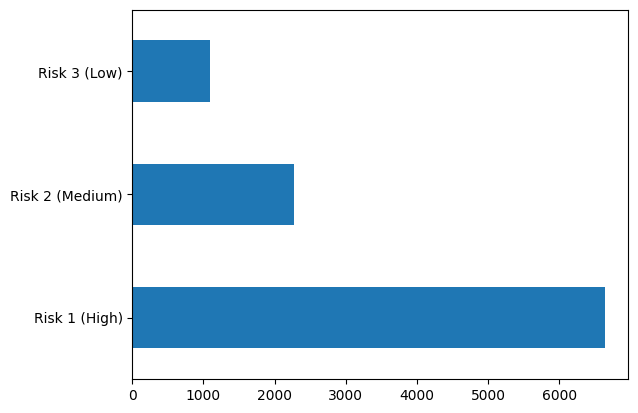

In [43]:
food_inspection_raw["risk"].value_counts().plot(kind="barh")

What are the most common violations?

In [46]:
food_inspection_raw["violations"].value_counts().sort_values(ascending=False)

38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS REQUIRED: PLUMBING: INSTALLED AND MAINTAINED - Comments: INSTRUCTED TO SELF CONTAIN WASTE WATER BUCKET AT PORTABLE SINK.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

What are the most common outcomes?

<Axes: >

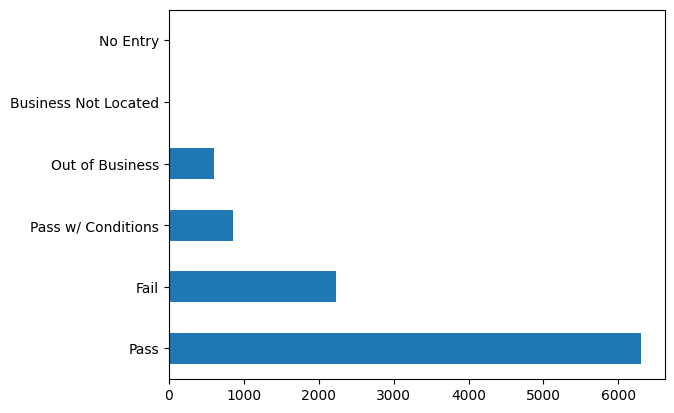

In [47]:
food_inspection_raw["results"].value_counts().plot(kind="barh")

What are the most common facility types?

In [49]:
food_inspection_raw["facility_type"].value_counts().sort_values(ascending=False).head(25)

Restaurant                         6097
Grocery Store                      1408
School                              783
Daycare (2 - 6 Years)               183
Bakery                              155
Daycare Above and Under 2 Years     136
Children's Services Facility        128
Mobile Food Dispenser               115
Wholesale                            90
Daycare Combo 1586                   70
KIOSK                                64
Liquor                               62
Catering                             56
Long Term Care                       39
Daycare (Under 2 Years)              25
Special Event                        16
Golden Diner                         15
Hospital                             15
Navy Pier Kiosk                      14
TAVERN                               14
Shelter                               7
LIVE POULTRY                          6
CHURCH                                6
GAS STATION                           6
DAYCARE                               6


In [45]:
food_inspection_raw

,inspection_id,dba_name,aka_name,license_,facility_type,risk,address,city,state,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location
0,505211,DLS SUPERMARKET INC.,DLS SUPERMARKET INC,2079431,Grocery Store,Risk 3 (Low),3659 W DIVISION ST,CHICAGO,IL,60651,2011-02-04T00:00:00.000,License,Fail,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.902624889105226,-87.71893483720407,"(41.902624889105226, -87.71893483720407)"
1,491576,Calhoun North,Calhoun North,26001,School,Risk 1 (High),2833 W Adams St (200S),CHICAGO,IL,60612,2011-02-04T00:00:00.000,Canvass,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.878221146360936,-87.69755292180749,"(41.878221146360936, -87.69755292180749)"
2,557211,LE POULET,LE POULET,2043161,Restaurant,Risk 2 (Medium),3205 N OPAL AVE,CHICAGO,IL,60634,2011-02-04T00:00:00.000,Canvass Re-Inspection,Pass,None,41.93800880836629,-87.82248678693516,"(41.93800880836629, -87.82248678693516)"
3,158453,MORGAN ELEMENTARY,MORGAN ELEMENTARY,24501,School,Risk 1 (High),8407 S Kerfoot (700W),CHICAGO,IL,60620,2011-02-04T00:00:00.000,Canvass,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.74124548972356,-87.64007165863106,"(41.74124548972356, -87.64007165863106)"
4,539210,Auntie Anne's Pretzels,Auntie Anne's Pretzels (T2 E/F),1942304,Restaurant,Risk 2 (Medium),11601 W TOUHY AVE,CHICAGO,IL,60666,2011-02-04T00:00:00.000,Canvass,Fail,8. SANITIZING RINSE FOR EQUIPMENT AND UTENSILS...,42.008536400868735,-87.91442843927047,"(42.008536400868735, -87.91442843927047)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,604367,VILLA ROSA PIZZA AND PASTA,VILLA ROSA PIZZA AND PASTA,1887536,Restaurant,Risk 1 (High),5345 W DEVON AVE,CHICAGO,IL,60646,2011-08-11T00:00:00.000,Canvass,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.99722474001257,-87.7625872415933,"(41.99722474001257, -87.7625872415933)"
9996,634259,TACO BELL #15855,TACO BELL #15855,56987,Restaurant,Risk 1 (High),1111 W ADDISON ST,CHICAGO,IL,60613,2011-08-11T00:00:00.000,Tag Removal,Pass w/ Conditions,None,41.947056373374444,-87.65796549962256,"(41.947056373374444, -87.65796549962256)"
9997,634254,SYDNEY MAROVITZ GOLF COURSE,CLOCK TOWER CAFE,2055272,Restaurant,Risk 3 (Low),3600 N RECREATION DR,CHICAGO,IL,60613,2011-08-11T00:00:00.000,License,Fail,"11. ADEQUATE NUMBER, CONVENIENT, ACCESSIBLE, D...",41.9488655712457,-87.64303424515734,"(41.9488655712457, -87.64303424515734)"
9998,634251,PIZZA HUT #405039,PIZZA HUT #405039,1249531,Restaurant,Risk 2 (Medium),4925 W NORTH AVE,CHICAGO,IL,60639,2011-08-11T00:00:00.000,Short Form Complaint,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.90946997358203,-87.74966585106277,"(41.90946997358203, -87.74966585106277)"


### Activity 3 - Tidy Data

#### 🔄 Task

#### ✅ Solution

### Activity 4 - Validate Data

#### 🔄 Task

#### ✅ Solution

### Activity X

#### 🔄 Task

#### ✅ Solution